In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default='notebook'

In [2]:
data = pd.read_csv('casestudy.csv')

In [4]:
data = data.drop('Unnamed: 0',axis = 1)

In [5]:
data

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...
685922,qzqttwiftu@gmail.com,184.58,2017
685923,pjodiifjop@gmail.com,133.03,2017
685924,appaplmgko@gmail.com,200.98,2017
685925,wvkpmwsgck@gmail.com,235.35,2017


In [7]:
data_2015 = data[data['year'] == 2015]
data_2016 = data[data['year'] == 2016]
data_2017 = data[data['year'] == 2017]

In [8]:
data_2015

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...
231289,xtrpmgjbwp@gmail.com,216.89,2015
231290,peeorxpsbr@gmail.com,39.16,2015
231291,vanasezjpw@gmail.com,233.46,2015
231292,dnpremlztb@gmail.com,136.27,2015


In [44]:
len(data_2015['customer_email'].unique())

231294

In [24]:
data_2016

,customer_email,net_revenue,year
231294,mwrossuukz@gmail.com,197.26,2016
231295,gkwsoupawk@gmail.com,38.28,2016
231296,vlyigtgfzs@gmail.com,154.57,2016
231297,yfirychuhk@gmail.com,102.47,2016
231298,trnzgqinuu@gmail.com,32.03,2016
...,...,...,...
435935,mezrjfkced@gmail.com,114.17,2016
435936,rdotspqdxi@gmail.com,169.79,2016
435937,fkweqlmmjw@gmail.com,79.71,2016
435938,pidugzoeej@gmail.com,116.80,2016


In [45]:
len(data_2016['customer_email'].unique())

204646

In [25]:
data_2017

,customer_email,net_revenue,year
435940,mwrossuukz@gmail.com,96.61,2017
435941,qvjfterwnk@gmail.com,176.00,2017
435942,vlyigtgfzs@gmail.com,73.47,2017
435943,yfirychuhk@gmail.com,138.17,2017
435944,fdkiioqtli@gmail.com,156.87,2017
...,...,...,...
685922,qzqttwiftu@gmail.com,184.58,2017
685923,pjodiifjop@gmail.com,133.03,2017
685924,appaplmgko@gmail.com,200.98,2017
685925,wvkpmwsgck@gmail.com,235.35,2017


In [46]:
len(data_2017['customer_email'].unique())

249987

### Total revenue for the current year

2015:

In [9]:
data_2015['net_revenue'].sum()

29036749.189999994

2016:

In [10]:
data_2016['net_revenue'].sum()

25730943.59

2017:

In [11]:
data_2017['net_revenue'].sum()

31417495.030000016

### New Customer Revenue e.g. new customers not present in previous year only

2015-2016

In [21]:
temp = data_2016.merge(data_2015,on = 'customer_email',how = 'left')

In [22]:
temp

,customer_email,net_revenue_x,year_x,net_revenue_y,year_y
0,mwrossuukz@gmail.com,197.26,2016,NaN,NaN
1,gkwsoupawk@gmail.com,38.28,2016,NaN,NaN
2,vlyigtgfzs@gmail.com,154.57,2016,NaN,NaN
3,yfirychuhk@gmail.com,102.47,2016,NaN,NaN
4,trnzgqinuu@gmail.com,32.03,2016,NaN,NaN
...,...,...,...,...,...
204641,mezrjfkced@gmail.com,114.17,2016,118.19,2015.0
204642,rdotspqdxi@gmail.com,169.79,2016,NaN,NaN
204643,fkweqlmmjw@gmail.com,79.71,2016,NaN,NaN
204644,pidugzoeej@gmail.com,116.80,2016,NaN,NaN


In [23]:
temp[temp['net_revenue_y'].isna()==True]['net_revenue_x'].sum()

18245491.01

2016-2017

In [26]:
temp2 = data_2017.merge(data_2016,on = 'customer_email',how = 'left')

In [27]:
temp2[temp2['net_revenue_y'].isna()==True]['net_revenue_x'].sum()

28776235.039999995

### Existing Customer Growth

2015-2016

In [36]:
existing_cus = temp[temp['net_revenue_y'].isna()==False]

In [37]:
existing_cus['growth'] = existing_cus['net_revenue_x'] - existing_cus['net_revenue_y']

<ipython-input-37-e81cb32d9f84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  existing_cus['growth'] = existing_cus['net_revenue_x'] - existing_cus['net_revenue_y']


In [39]:
existing_cus['growth'].sum()

20335.459999999985

2016-2017

In [40]:
existing_cus2 = temp2[temp2['net_revenue_y'].isna()==False]

In [41]:
existing_cus2['growth'] = existing_cus2['net_revenue_x'] - existing_cus2['net_revenue_y']

<ipython-input-41-bbe100342580>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  existing_cus2['growth'] = existing_cus2['net_revenue_x'] - existing_cus2['net_revenue_y']


In [42]:
existing_cus2['growth'].sum()

20611.340000000004

### Revenue lost from attrition

Since we have no idea of how much profit we can earn from the lost customers in the coming year, I would just use the attrited customers' profit last year to estimate the attrition.

2015-2016

In [52]:
temp3 = data_2015.merge(data_2016,on = 'customer_email',how = 'left')

In [53]:
temp3

,customer_email,net_revenue_x,year_x,net_revenue_y,year_y
0,nhknapwsbx@gmail.com,249.92,2015,NaN,NaN
1,joiuzbvcpn@gmail.com,87.61,2015,NaN,NaN
2,ukkjctepxt@gmail.com,168.38,2015,NaN,NaN
3,gykatilzrt@gmail.com,62.40,2015,NaN,NaN
4,mmsgsrtxah@gmail.com,43.08,2015,NaN,NaN
...,...,...,...,...,...
231289,xtrpmgjbwp@gmail.com,216.89,2015,NaN,NaN
231290,peeorxpsbr@gmail.com,39.16,2015,NaN,NaN
231291,vanasezjpw@gmail.com,233.46,2015,NaN,NaN
231292,dnpremlztb@gmail.com,136.27,2015,NaN,NaN


In [55]:
lost_cus1 =temp3[temp3['net_revenue_y'].isna()==True]

In [57]:
lost_cus1['net_revenue_x'].sum()

21571632.070000004

2016-2017

In [58]:
temp4 = data_2016.merge(data_2017,on = 'customer_email',how = 'left')

In [59]:
lost_cus2 = temp4[temp4['net_revenue_y'].isna()==True]

In [60]:
lost_cus2['net_revenue_x'].sum()

23110294.939999998

### Existing Customer Revenue Current Year

2015-2016

In [61]:
existing_cus['net_revenue_x'].sum()

7485452.58

2016-2017

In [62]:
existing_cus2['net_revenue_x'].sum()

2641259.99

### Existing Customer Revenue Previous Year

2017-2016

In [63]:
pre_cus = temp4[temp4['net_revenue_y'].isna()==False]

In [64]:
pre_cus['net_revenue_y'].sum()

2641259.99

2016-2015

In [65]:
pre_cus2 = temp3[temp3['net_revenue_y'].isna()==False]

In [66]:
pre_cus2['net_revenue_y'].sum()

7485452.58

### Total Customers Current  Year

2015

In [68]:
data_2015['customer_email'].nunique()

231294

2016

In [69]:
data_2016['customer_email'].nunique()

204646

2017

In [70]:
data_2017['customer_email'].nunique()

249987

### Total Customers Previous Year

2016-2015

In [72]:
data_2015['customer_email'].nunique()

231294

2017-2016

In [73]:
data_2016['customer_email'].nunique()

204646

### New Customers

2015-2016

In [74]:
temp[temp['net_revenue_y'].isna()==True]['customer_email'].nunique()

145062

2016-2017

In [75]:
temp2[temp2['net_revenue_y'].isna()==True]['customer_email'].nunique()

229028

### Lost Customers

2015-2016

In [76]:
temp3[temp3['net_revenue_y'].isna()==True]['customer_email'].nunique()

171710

2016-2017

In [77]:
temp4[temp4['net_revenue_y'].isna()==True]['customer_email'].nunique()

183687

### Few plots

1.number of customers

Text(0.5, 1.0, 'number of customers each year')

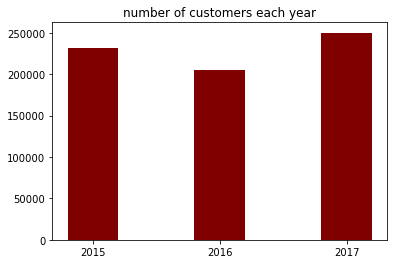

In [83]:
customers = [231294,204646,249987]
year = ['2015','2016','2017']
plt.bar(year, customers, color ='maroon',
        width = 0.4)
plt.title('number of customers each year')

2. total revenue each year

Text(0.5, 1.0, 'Total revenue each year')

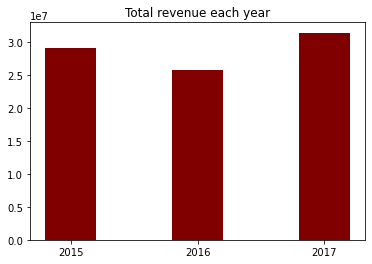

In [85]:
revenue = [29036749.189999994,25730943.59,31417495.030000016]
year = ['2015','2016','2017']
plt.bar(year, revenue, color ='maroon',
        width = 0.4)
plt.title('Total revenue each year')

3.new customer

Text(0.5, 1.0, 'new customer')

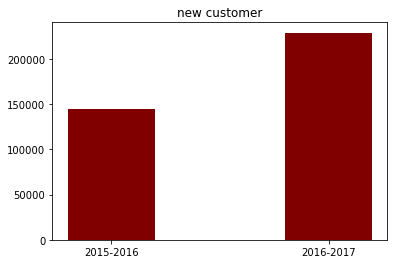

In [89]:
revenue = [145062,229028]
year = ['2015-2016','2016-2017']
plt.bar(year, revenue, color ='maroon',
        width = 0.4)
plt.title('new customer')

4.customer number dynamics

In [118]:
year = ['2015','2016','2017']
base_cus = [231294,231294,204646]
cus_accuired = [0,145062,229028]
cus_lost = [0,-171710,-183687]

In [119]:
df = pd.DataFrame({'year':year,\
                   "customer_previous_year":base_cus,\
                   'new_customer_accquired':cus_accuired,
                   'customer_lost':cus_lost})

In [121]:
df 

,year,customer_previous_year,new_customer_accquired,customer_lost
0,2015,231294,0,0
1,2016,231294,145062,-171710
2,2017,204646,229028,-183687


In [120]:
import plotly.express as px
fig = px.bar(df, x="year", y=["customer_previous_year", "new_customer_accquired", "customer_lost"],
             title="customer number dynamics")
fig.show()

Insight 1: Compared to 2015, 2016 evidenced the customer decrease because more customers attrited than new customers acquired, in 2017 the customer number starts to grow because the number of newly acquired customers exceeds the number of customer loss at the same period. Therefore, we need to on hand keep the good work on attracting new customers and on the other hand, try to fix the deteriorating customer loss issue.

5. total revenue dynamics

In [109]:
year = ['2015','2016','2017']
base_revenue = [29036749.189999994,0,0]
existing_customer = [0,7485452.58,2641259.99]
new_customer_revenue = [0,18245491.01,28776235.039999995]

In [110]:
df2 = pd.DataFrame({'year':year,"base_revenue":base_revenue,\
                   "existing_customer_current_year":existing_customer,\
                   'new_customer_revenue':new_customer_revenue})

In [111]:
fig = px.bar(df2, x="year", y=["base_revenue", "existing_customer_current_year",'new_customer_revenue'],
             title="revenue dynamics")
fig.show()

Insight 2: new customers are the key drivers of the revenue because they are always the larger portion of revenue decomposition. Therefore, we need to prioritize the new user aquisitions when we have limited resources. Also, the decrease of the existing customer spending's is a concern and we need to figure out why it decreases significantly compared to 2016.